<a href="https://colab.research.google.com/github/eith010/ANN_HW1/blob/main/The_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Report

**Development Tool:** CoLab using accelerators (GPU/TPU)

**Frameworks:** TensorFlow, Keras

In all models, Data Generators were used to provide the images to the models.

All the models have been submitted will be explained through steps in this report.

**Model-1:**

We started with a simple model consists of 3 convolutional layers, classifier layer and output layer.

Mean Accuracy= 0.3170 

**Model-2:**

In this model Data Agumnetation was used to create more images with that increases the dataset, and thus should increase the accuracy of the model. It increased only by 2%, although the accuracy during the training hit 0.9 and that might mean there is a generlaiztion problem.

Mean Accuracy= 0.3340

**Model-3:**

This model was trained again with Data Agumention, but with Transfer Learning using VGG16 then Fine Tuning was added to improve the accuracy, but this time the accuracy even decreased drastically.

Mean Accuracy= 0.1755

**Model-4:**

This is the best model we have obtained, in this model we decided to train without Data Augmentation, but adding Transfer Learning to improve the accuracy, it is improved this time.

Mean Accuracy= 0.4321

We tried to add Fine Tuning to the last model, but due to GPU limit we couldn’t fully train the model. 

All plots are shown in each model's notebook separately. 


#The Model

In [ ]:
#Connect to Drive

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [ ]:
# Importing all required libraries

import tensorflow as tf
import numpy as np
import os                   #for changing and identifying the current directory, fetch its content and creating new directories
import random
import pandas as pd
import seaborn as sns       #helps in plotting, based on matplotlib
import matplotlib as mpl    
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    #for splitting data set into training and validation
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


In [ ]:
# Random seed for reproducibility. 
# Using random seed value while creating training and test datasets to make sure we get the same training and validation datasets while we use different hyperparameters or machine learning algorithms in order to assess the performance of different models.
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)


In [ ]:
# The classes of the dataset
labels = [
    'Apple', 
    'Blueberry', 
    'Cherry', 
    'Corn', 
    'Grape', 
    'Orange', 
    'Peach', 
    'Pepper', 
    'Potato', 
    'Raspberry',
    'Soybean', 
    'Squash', 
    'Strawberry', 
    'Tomato', 
]

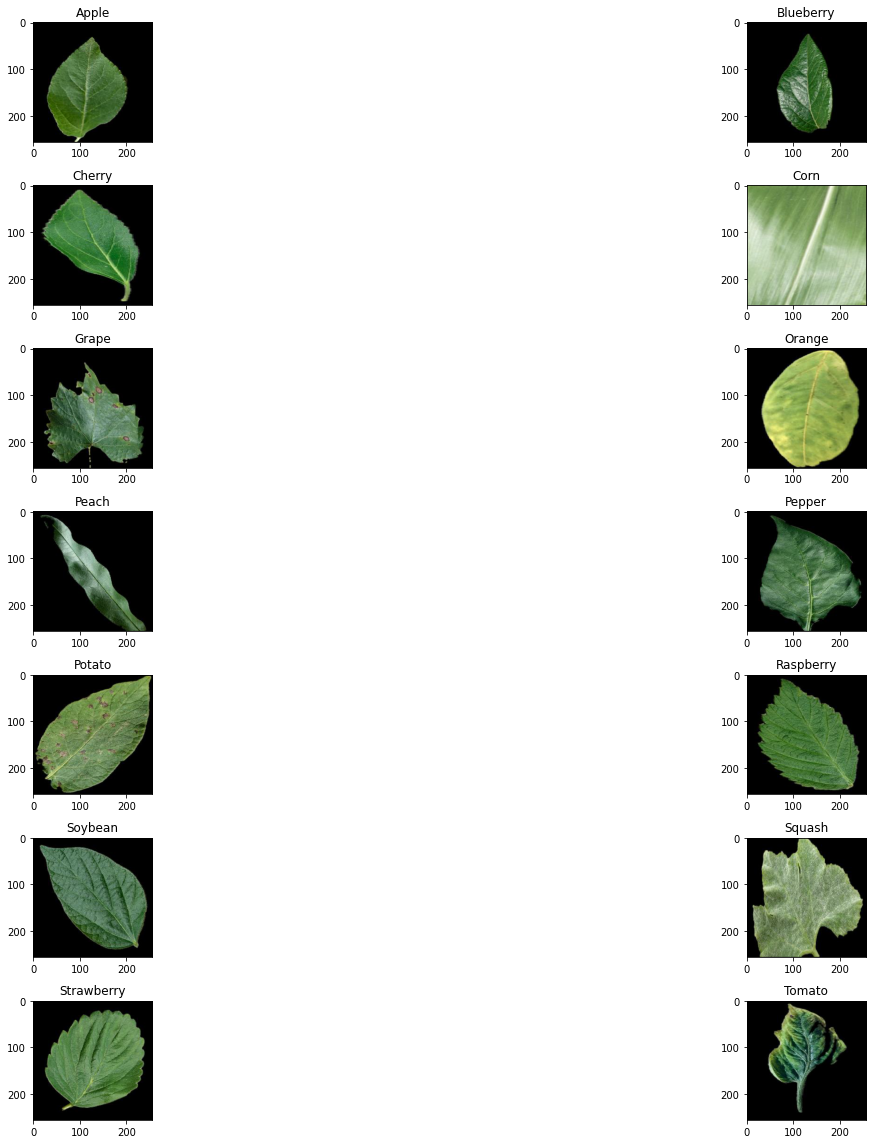

In [ ]:
# Checking if we are reading all folders and printing 1 image from each
num_row = 7
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_row,8*num_col))
for i in range(num_row*num_col):
  if i < 14:
    class_imgs = next(os.walk('Leaves_dataset/training/{}/'.format(labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('Leaves_dataset/training/{}/{}'.format(labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
# Dataset directory
dataset_dir= 'Leaves_dataset/training/'

In [ ]:
# Inspecting dataset structure on disk, making sure if we are reading from dataset correctly

print("Depth 0 (Leaves_dataset)")
print("-------")
!ls Leaves_dataset
print()
print("Depth 1 (e.g., Leaves_dataset/training)")
print("------------------------")
!ls Leaves_dataset/training
print()
print("Depth 2 (e.g., Leaves_dataset/training/Apple)")
print("----------------------------")
!ls Leaves_dataset/training/Apple

Depth 0 (Leaves_dataset)
-------
training

Depth 1 (e.g., Leaves_dataset/training)
------------------------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 2 (e.g., Leaves_dataset/training/Apple)
----------------------------
00001.jpg  00182.jpg  00355.jpg  00537.jpg  22499.jpg  22682.jpg  22855.jpg
00003.jpg  00183.jpg  00357.jpg  00538.jpg  22501.jpg  22683.jpg  22856.jpg
00004.jpg  00184.jpg  00358.jpg  00539.jpg  22502.jpg  22684.jpg  22857.jpg
00005.jpg  00185.jpg  00359.jpg  00540.jpg  22504.jpg  22685.jpg  22858.jpg
00006.jpg  00186.jpg  00360.jpg  00543.jpg  22505.jpg  22686.jpg  22859.jpg
00007.jpg  00187.jpg  00361.jpg  00544.jpg  22506.jpg  22687.jpg  22860.jpg
00008.jpg  00188.jpg  00362.jpg  00545.jpg  22507.jpg  22688.jpg  22861.jpg
00009.jpg  00189.jpg  00363.jpg  00546.jpg  22509.jpg  22690.jpg  22862.jpg
00011.jpg  00192.jpg  00364.jpg  00547.jpg  22510.jpg  22691.jpg  22863.jpg
00012.

In [ ]:
# Using ImageDataGenerator to load images from directory (flow_from_directory) and splitting 20% of the images as validation set.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(validation_split=0.2)    

train_gen = image_generator.flow_from_directory(
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="training"
                                                 )

validation_gen = image_generator.flow_from_directory( 
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=False,
                                                 seed=seed,
                                                 subset="validation"
                                                 )

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Apple': 0, 'Blueberry': 1, 'Cherry': 2, 'Corn': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}

Target classes
[ 0  0  0 ... 13 13 13]


In [ ]:
# Generating batches of images

def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label: 6
Class name: Peach


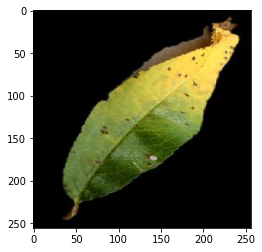

In [ ]:
# Getting a sample from dataset and show info
_ = get_next_batch(train_gen)

In [ ]:
# Input image is 256*256 in rgb colors, setting epochs to 100
input_shape = (256, 256, 3)
epochs = 100

### Transfer Learning


In [ ]:
# Using Transfer learning
# Apply same preprocessing used to train the supernet 
from tensorflow.keras.applications.vgg16 import preprocess_input


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

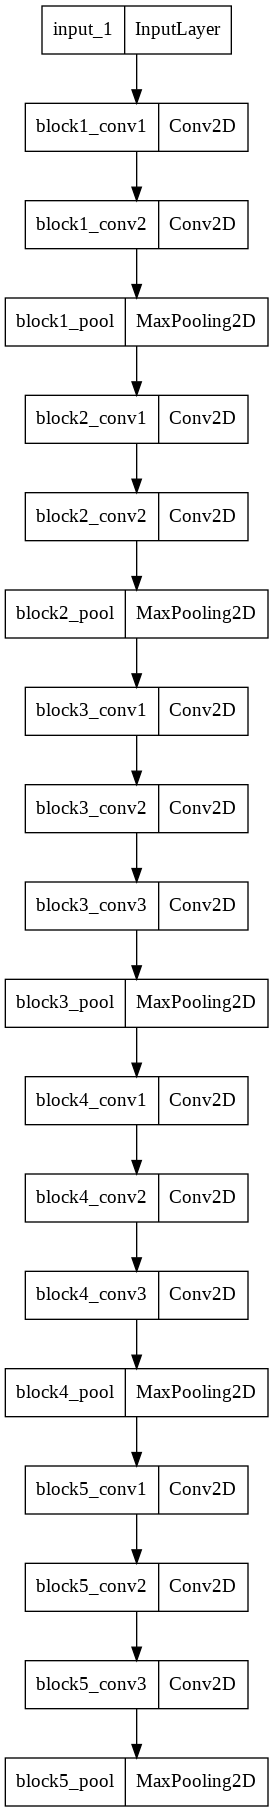

In [ ]:
# VGG16 is used to increase the receptive field by multiplying many convolutional layers
# Download and plot the pre-trained VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)
supernet.summary()
tfk.utils.plot_model(supernet)

In [ ]:
# Using the supernet as feature extractor
supernet.trainable = False

inputs = tfk.Input(shape=(256,256,3))
x = inputs
x = supernet(x)
x = tfkl.Flatten(name='Flattening')(x)
x = tfkl.Dropout(0.3, seed=seed)(x)
x = tfkl.Dense(
    256, 
    activation='relu',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)
x = tfkl.Dropout(0.3, seed=seed)(x)
outputs = tfkl.Dense(
    14, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)


# Connect input and output through the Model class
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                3598  

In [ ]:
# Utility function to create folders and callbacks for training
# The Callback is used to give a view on internal states and statistics of the model during the training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('hw1_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoints are used to save the full model and not just weights in case of any failure 
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping is used here with patience =10 to avoid the overfitting
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [ ]:
tf.get_logger().setLevel('WARNING')   # if you want to suppress only INFOs
tf.get_logger().setLevel('ERROR')     # if you want to suppress both WARNINGs and INFOs


# Creating folders and callbacks 
transfer_callbacks = create_folders_and_callbacks(model_name='TransferLearning_Model')

# Training the model, by using Transfer Learning only FC layers are trained
tl_history = tl_model.fit(
    x = train_gen,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = transfer_callbacks,
).history

Epoch 1/100
1774/1774 [==============================] - 3036s 2s/step - loss: 1.6275 - accuracy: 0.7552 - val_loss: 0.9185 - val_accuracy: 0.8079
Epoch 2/100
1774/1774 [==============================] - 309s 174ms/step - loss: 0.7446 - accuracy: 0.8171 - val_loss: 0.4454 - val_accuracy: 0.8858
Epoch 3/100
1774/1774 [==============================] - 311s 175ms/step - loss: 0.6542 - accuracy: 0.8421 - val_loss: 0.4317 - val_accuracy: 0.9062
Epoch 4/100
1774/1774 [==============================] - 311s 176ms/step - loss: 0.5219 - accuracy: 0.8784 - val_loss: 0.4151 - val_accuracy: 0.9186
Epoch 5/100
1774/1774 [==============================] - 312s 176ms/step - loss: 0.4835 - accuracy: 0.8889 - val_loss: 0.4030 - val_accuracy: 0.9031
Epoch 6/100
1774/1774 [==============================] - 312s 176ms/step - loss: 0.4119 - accuracy: 0.9003 - val_loss: 0.5877 - val_accuracy: 0.8892
Epoch 7/100
1774/1774 [==============================] - 312s 176ms/step - loss: 0.3886 - accuracy: 0.9076 -

In [ ]:
# Saving the best epoch model
tl_model.save("hw1_experiments_New/TransferModel_Best_New")

INFO:tensorflow:Assets written to: hw1_experiments_New/TransferModel_Best_New/assets


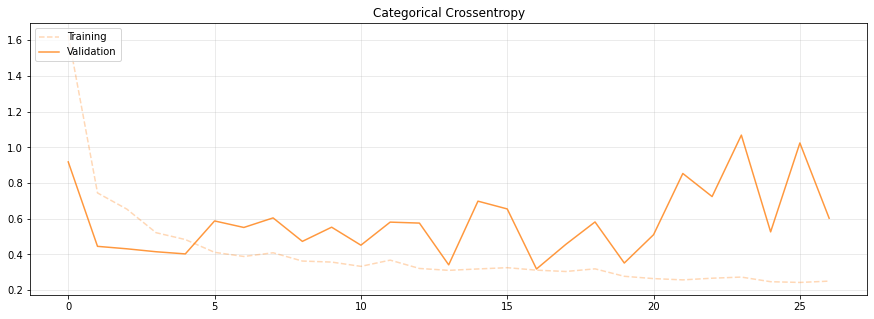

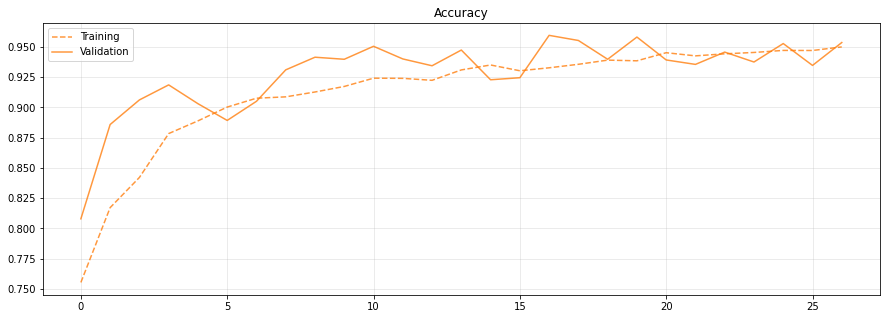

In [ ]:
# Plot both Categorical Crossentropy and Accuracy for training vs validation to check the overfitting 
plt.figure(figsize=(15,5))
plt.plot(tl_history['loss'], label='Training', alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(tl_history['val_loss'], label='Validation', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(tl_history['accuracy'], label='Training', alpha=.8, color='#ff7f0e', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Validation', alpha=.8, color='#ff7f0e')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

#Fine Tuning


In [ ]:
# Re-loading the model after transfer learning
ft_model = tfk.models.load_model('hw1_experiments_New/TransferModel_Best_New')
ft_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                3598  

In [ ]:
# In Fine Tuning the part of CNN layers are trained
# Setting all VGG layers to True
ft_model.get_layer('vgg16').trainable = True
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
   print(i, layer.name, layer.trainable)

0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
# Freeze first N layers, e.g., until  10
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:10]):
  layer.trainable=False
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
   print(i, layer.name, layer.trainable)
ft_model.summary()

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
  

In [ ]:
# Compile the model
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

In [ ]:
# Create folders and callbacks 
transfer_callbacks = create_folders_and_callbacks(model_name='FineTuning_Model')

# Fit the model
ft_history = ft_model.fit(
    x =train_gen,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = transfer_callbacks,
).history

Epoch 1/100
 599/1774 [=========>....................] - ETA: 3:13:21 - loss: 2.8765 - accuracy: 0.0520

In [ ]:
ft_model.save('hw1_experiments_New/FineTuning_Best_New)

In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(standard_history['loss'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(standard_history['val_loss'], label='Standard', alpha=.8, color='#ff7f0e')
plt.plot(tl_history['loss'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_loss'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['loss'], alpha=.3, color='#2ABC3D', linestyle='--')
plt.plot(ft_history['val_loss'], label='Fine Tuning', alpha=.8, color='#2ABC3D')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(standard_history['accuracy'], alpha=.3, color='#ff7f0e', linestyle='--')
plt.plot(standard_history['val_accuracy'], label='Standard', alpha=.8, color='#ff7f0e')
plt.plot(tl_history['accuracy'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['accuracy'], alpha=.3, color='#2ABC3D', linestyle='--')
plt.plot(ft_history['val_accuracy'], label='Fine Tuning', alpha=.8, color='#2ABC3D')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()